### <center>San Jose State University<br>Department of Applied Data Science<br><br>**DATA 200<br>Computational Programming for Data Analytics**<br><br>Spring 2024<br>Instructor: Ron Mak</center>

# Stacked Bar Charts

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Stacked bar chart parameters
#### Call `plt.bar()` for each stacked bar. After the first bar, include the `bottom` argument to raise the bar the right amount to stack on top of the bars below.
#### Example:
``` Python
plt.bar(x, bar1)
plt.bar(x, bar2, bottom=bar1)                # raise by the height of bar1
plt.bar(x, bar3, bottom=np.add(bar1, bar2))  # raise by the heights of bar1 and bar2
```

#### You are the owner of a restaurant and due to a new law you must introduce a smoking free day. To make as few losses as possible you want to visualize how much sales are made every day according to smoking and non-smoking people. Use a stacked bar plot to visualize the performance of a restaurant. 
#### Goal:

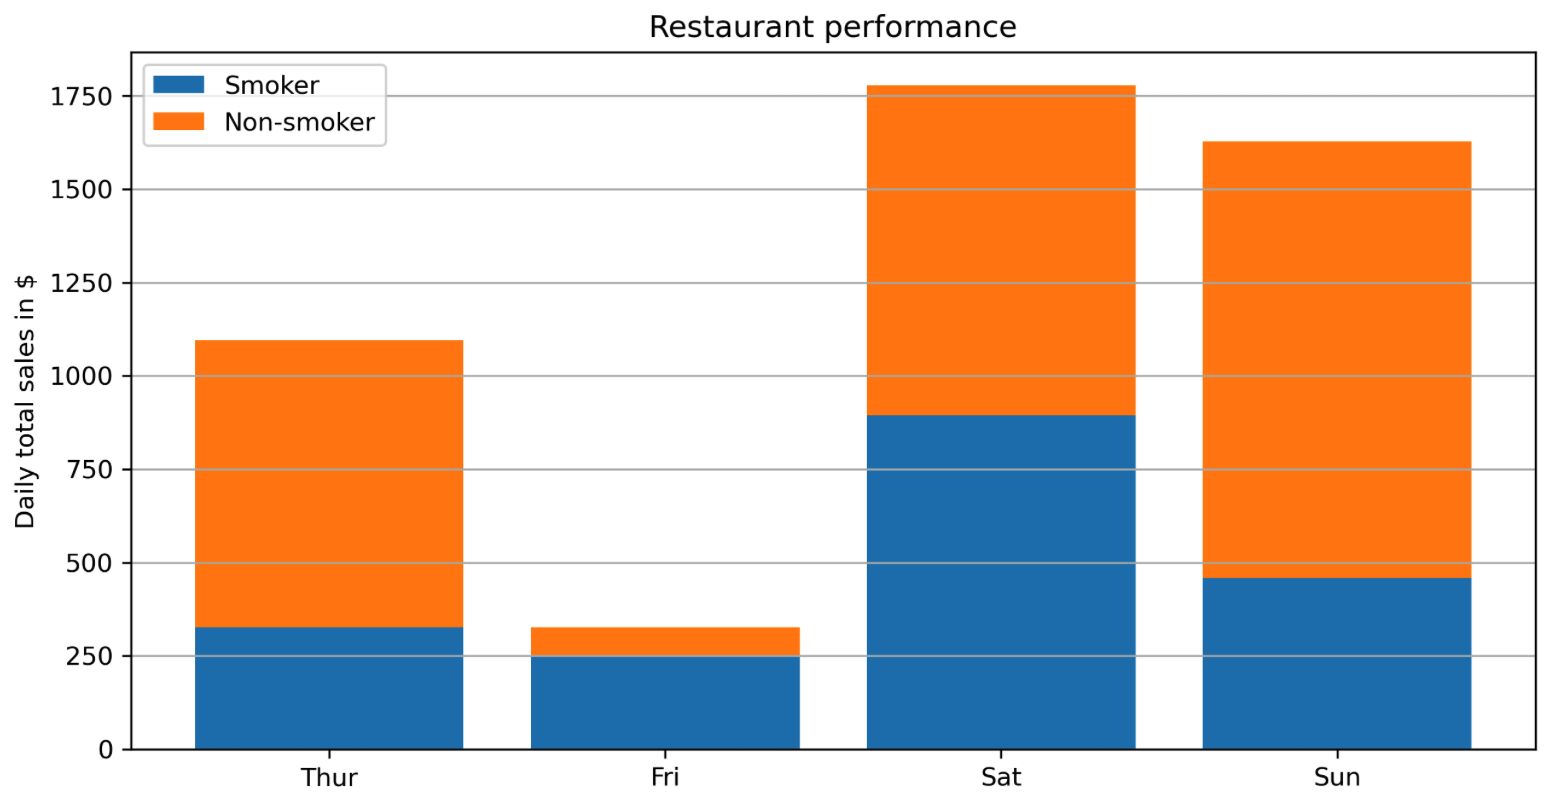

In [ ]:
bills_df = pd.read_csv('restaurant_bills.csv')
bills_df

# Example: Restaurant Performance
#### Use the given dataset and create a 4 x 2 matrix where the elements contain the sum of the total bills for each day (the rows) and smoking/non-smoking person (the columns).

## Plan
#### Split this overall dataframe into eight dataframes and store the new dataframes in a 2-d list: one row per day (Thursday through Sunday) and two columns per row (smoker yes and no).

In [ ]:
days = ['Thur', 'Fri', 'Sat', 'Sun']
days_arange = np.arange(len(days))

smoker = ['Yes', 'No']
smoker_arange = np.arange(len(smoker))

print(f'  {days_arange = }')
print(f'{smoker_arange = }')

## STEP 1: Create a 1-d list of dataframes.
#### Split the overall dataframe into four dataframes and store the new dataframes in a 1-d list. Each element of the list is a dataframe for a particular day.

In [ ]:
bills_by_days_list = [ bills_df[bills_df['day'] == day] for day in days ]

print(f'{len(bills_by_days_list) = }')

In [ ]:
for i in days_arange:
    print(f'Element {i}: {days[i]}')
    display(bills_by_days_list[i])

## STEP 2: Create a 2-d list of dataframes.
#### Split each dataframe in the 1-d list and store the new datafrmes in a 2-d list: a row for each day and two columns per row for smoker yes and no.

In [ ]:
bills_by_days_by_smoker_list = \
    [ [ bills_by_days_list[day][bills_by_days_list[day]['smoker'] == yn] 
        for yn in smoker
      ] 
      for day in days_arange
    ]

print(f'{len(bills_by_days_by_smoker_list)    = } rows')
print(f'{len(bills_by_days_by_smoker_list[0]) = } columns')

In [ ]:
for d in days_arange:
    for s in smoker_arange:
        print(f'Row {d}: {days[d]}, column {s}: smoker {smoker[s]}')
        display(bills_by_days_by_smoker_list[d][s])

## STEP 3: Create a 2-d list of totals.
#### Sum the `total_bill` column of each dataframe in the 2-d list.

In [ ]:
total_by_days_by_smoker_list = \
    [ [ bills_by_days_by_smoker_list[day][i]['total_bill'].sum() 
        for i in smoker_arange
      ]
      for day in days_arange
    ]

total_by_days_by_smoker_list

## STEP 4: Convert the 2-d totals list to a numpy matrix.

In [ ]:
totals_matrix = np.asarray(total_by_days_by_smoker_list)
totals_matrix

## STEP 5: Create the stacked bar plot.
#### Stack the summed smoking and non-smoking total bills separated for each day. Add a legend, labels, and a title.

In [ ]:
# Create the figure.
plt.figure(figsize=(10, 5), dpi=300)

# Create the stacked bar plot.
plt.bar(days_arange, totals_matrix[:, 0], label='Smoker')
plt.bar(days_arange, totals_matrix[:, 1], 
        bottom=totals_matrix[:, 0], label='Non-smoker')

ax = plt.gca()

# Add labels and the title.
plt.xticks(days_arange)
ax.set_xticklabels(days)
ax.yaxis.grid()
plt.ylabel('Daily total sales in $')
plt.title('Restaurant performance')

# Show the plot with a label.
plt.legend()
plt.show()

In [ ]:
plt.close()

#### Adapted from ***Data Visualization with Python***, by Mario Döbler and Tim Großmann, Packt 2019, ISBN 978-1-78995-646-7

In [ ]:
# Additional material (c) 2024 by Ronald Mak